<a href="https://colab.research.google.com/github/DhayuIntan/2141720026_PCVK_2023/blob/main/week-12/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

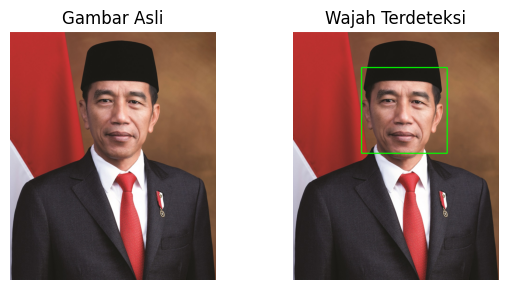

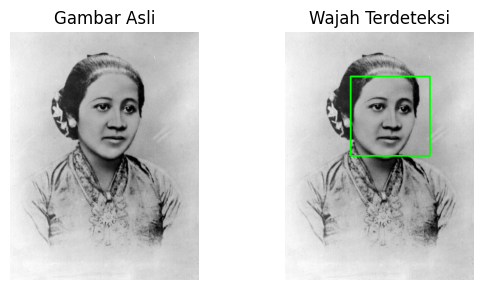

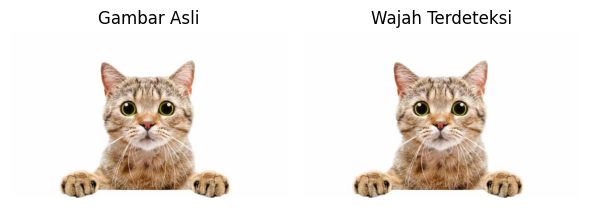

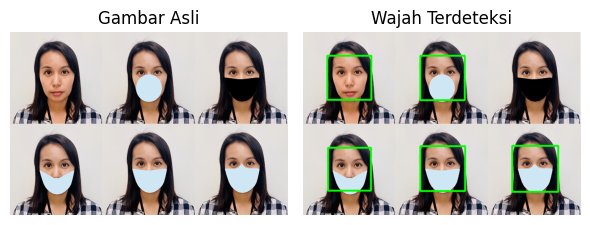

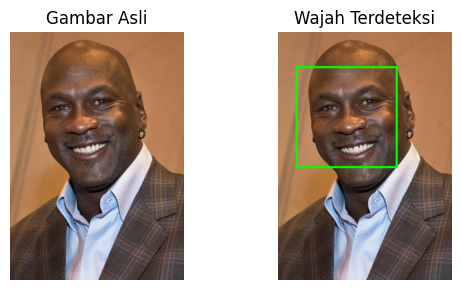

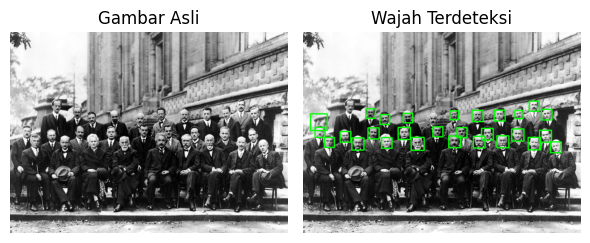

In [8]:
import cv2 as cv
import os
import matplotlib.pyplot as plt

# Memuat klasifikasi kaskade wajah
kaskade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/haarcascades/haarcascade_frontalface_alt.xml')

# Path menuju folder yang berisi gambar-gambar
path_folder_gambar = '/content/drive/MyDrive/Images/facedet'

# Daftar nama file spesifik
nama_file_spesifik = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

# Penghitung untuk menampilkan hanya 6 gambar
jumlah_tampilan = 0

# Iterasi melalui gambar-gambar dalam folder
for nama_file in nama_file_spesifik:
    # Memeriksa apakah file tersebut ada
    path_gambar = os.path.join(path_folder_gambar, nama_file)
    if os.path.exists(path_gambar):
        # Membaca gambar
        gambar = cv.imread(path_gambar)

        # Mendeteksi wajah dalam gambar
        wajah = kaskade_wajah.detectMultiScale(gambar)

        # Membuat subplot untuk menampilkan gambar asli dan yang telah diproses
        fig, axes = plt.subplots(1, 2, figsize=(6, 3))

        # Menampilkan gambar asli
        axes[0].imshow(cv.cvtColor(gambar, cv.COLOR_BGR2RGB))
        axes[0].set_title('Gambar Asli')
        axes[0].axis('off')

        # Menggambar persegi panjang di sekitar wajah yang terdeteksi (warna hijau)
        gambar_dengan_wajah = gambar.copy()
        for (x, y, w, h) in wajah:
            cv.rectangle(gambar_dengan_wajah, (x, y), (x+w, y+h), (0, 255, 0), 3)

        # Menampilkan gambar yang telah diproses dengan wajah yang terdeteksi
        axes[1].imshow(cv.cvtColor(gambar_dengan_wajah, cv.COLOR_BGR2RGB))
        axes[1].set_title('Wajah Terdeteksi')
        axes[1].axis('off')

        # Menyesuaikan jarak antar subplot
        plt.tight_layout()

        # Menampilkan plot
        plt.show()

        # Menambahkan penghitung tampilan
        jumlah_tampilan += 1

        # Menghentikan iterasi setelah menampilkan 6 gambar
        if jumlah_tampilan == 6:
            break

2. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

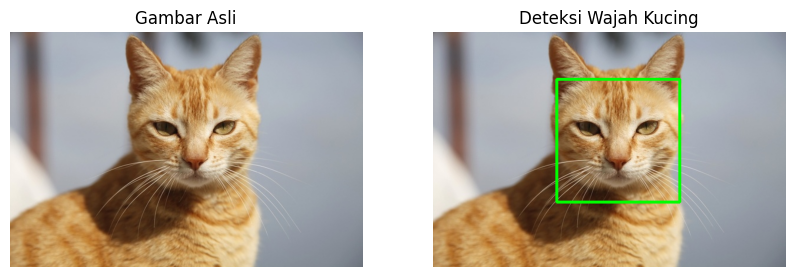

In [11]:
# Memuat gambar kucing
si_kucing = cv.imread('/content/drive/MyDrive/Images/facedet/mycat.jpg')
kucing_terdeteksi = si_kucing.copy()

# Kaskade wajah kucing untuk deteksi
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalcatface.xml")

# Mendeteksi wajah pada gambar 'kucing'
roi_wajah_kucing = face_cascade.detectMultiScale(kucing_terdeteksi)

# Menggambar persegi panjang di sekitar wajah kucing yang terdeteksi
for (x, y, w, h) in roi_wajah_kucing:
    cv.rectangle(kucing_terdeteksi, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Menampilkan gambar 'kucing' asli dan gambar dengan deteksi wajah kucing
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(si_kucing, cv.COLOR_BGR2RGB))
ax[0].set_title('Gambar Asli')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(kucing_terdeteksi, cv.COLOR_BGR2RGB))
ax[1].set_title('Deteksi Wajah Kucing')
ax[1].axis('off')

plt.show()

4. Cobakan juga untuk eyes detection.

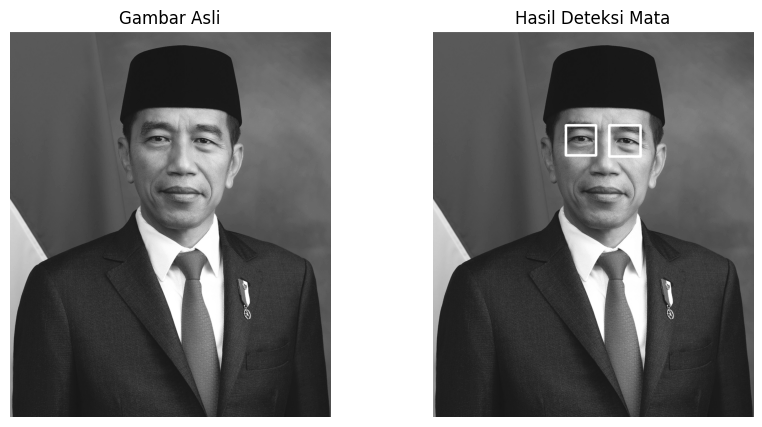

In [21]:
# Memuat gambar
gambar_jokowi = cv.imread('/content/drive/MyDrive/Images/facedet/jokowi.jpg')
gambar_jokowi_terdeteksi_wajah = gambar_jokowi.copy()

# Mendeteksi wajah
roi_wajah = kaskade_wajah.detectMultiScale(gambar_jokowi_terdeteksi_wajah)

# Kaskade mata untuk deteksi mata
cascade_mata = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")

# Untuk setiap wajah, deteksi mata dan gambar persegi panjang di sekitar mata
for (x, y, w, h) in roi_wajah:
    face_roi = gambar_jokowi_terdeteksi_wajah[y:y+h, x:x+w]  # Ekstrak daerah wajah
    mata = cascade_mata.detectMultiScale(face_roi)

    for (ex, ey, ew, eh) in mata:
        cv.rectangle(face_roi, (ex, ey), (ex+ew, ey+eh), (255, 255, 255), 5)

# Mengubah gambar 'gambar_jokowi_terdeteksi_wajah' menjadi skala abu-abu
gambar_jokowi_terdeteksi_wajah_abu = cv.cvtColor(gambar_jokowi_terdeteksi_wajah, cv.COLOR_BGR2GRAY)

# Menampilkan gambar 'gambar_jokowi' asli dalam skala abu-abu dan gambar 'gambar_jokowi_terdeteksi_wajah' dengan deteksi mata dalam skala abu-abu
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(gambar_jokowi, cv.COLOR_BGR2GRAY), cmap='gray')
ax[0].set_title('Gambar Asli')
ax[0].axis('off')

ax[1].imshow(gambar_jokowi_terdeteksi_wajah_abu, cmap='gray')
ax[1].set_title('Hasil Deteksi Mata')
ax[1].axis('off')

plt.show()


5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [22]:
import io
import html
import time
import PIL
%matplotlib inline
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
from matplotlib import pyplot as plt


## Helper Functions
Below are a few helper function to make converting between different image data types and formats.

In [24]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

## Haar Cascade Classifier
For this tutorial we will run a simple object detection algorithm called Haar Cascade on our images and video fetched from our webcam. OpenCV has a pre-trained Haar Cascade face detection model.

In [26]:
import cv2

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

## Webcam Images
Running code on images taken from webcam is fairly straight-forward. We will utilize code within Google Colab's **Code Snippets** that has a variety of useful code functions to perform various tasks.

We will be using the code snippet for **Camera Capture** to utilize your computer's webcam.

In [27]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(720, 1280)
Saved to photo.jpg


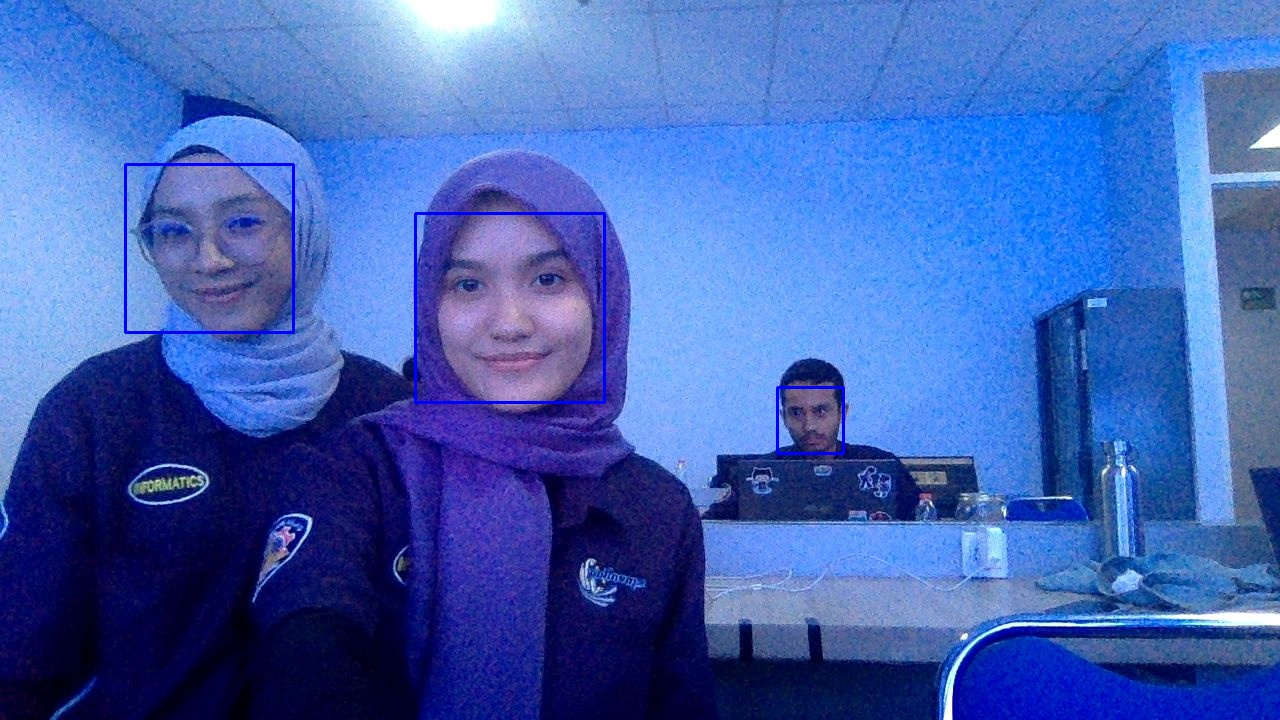

In [28]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [29]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [30]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

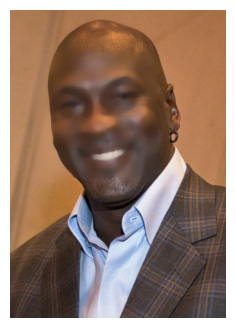

In [23]:
# Memuat kaskade deteksi wajah
kaskade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/haarcascades/haarcascade_frontalface_alt.xml')

# Memuat gambar Jordan
gambar_jordan = cv.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')

# Mengonversi gambar ke skala grayscale
gray = cv.cvtColor(gambar_jordan, cv.COLOR_BGR2GRAY)

# Mendeteksi wajah pada gambar
roi_wajah = kaskade_wajah.detectMultiScale(gray)

# Iterasi pada wajah yang terdeteksi
for (x, y, w, h) in roi_wajah:
    # Memotong daerah wajah
    wajah_roi = gambar_jordan[y:y+h, x:x+w]

    # Menggunakan median blur pada daerah wajah
    wajah_terblur = cv.medianBlur(wajah_roi, 15)

    # Mengganti daerah wajah dengan wajah yang telah di-blur
    gambar_jordan[y:y+h, x:x+w] = wajah_terblur

# Menampilkan gambar dengan wajah yang telah di-blur
plt.figure(figsize=(8, 4))
plt.imshow(cv.cvtColor(gambar_jordan, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

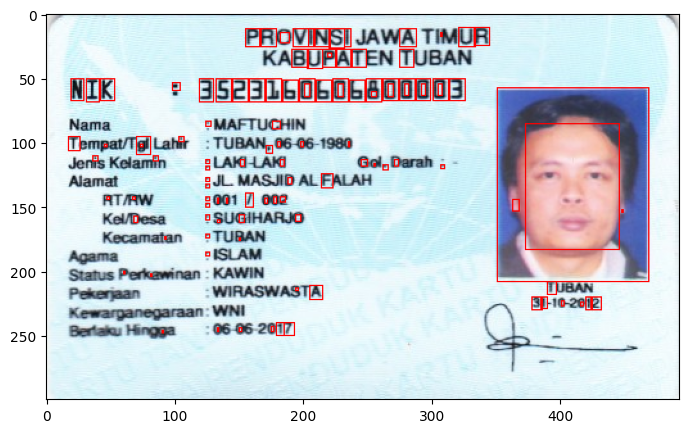

In [38]:
# Memuat data gambar KTP
gambar_ktp = cv.imread('/content/drive/MyDrive/Images/KTP_More/ktp3.png')

# Melakukan Gaussian Blur pada gambar
gambar_blurred = cv.GaussianBlur(gambar_ktp, (5, 5), 0.5)

# Konversi gambar ke skala abu-abu
abu = cv.cvtColor(gambar_blurred, cv.COLOR_BGR2GRAY)

# Thresholding menggunakan Otsu
ret, bw = cv.threshold(abu.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
kontur, hierarki = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Melakukan iterasi pada kontur untuk mendapatkan kontur yang sesuai
for cnt in kontur:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
        cv.rectangle(gambar_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
        cv.rectangle(gambar_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar hasil
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(gambar_ktp, cv.COLOR_BGR2RGB))


8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

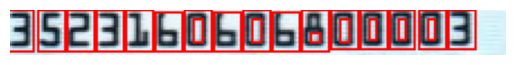

In [51]:
# Koordinat untuk proses cropping
crop_y_start = 50
crop_y_end = 70
crop_x_start = 120
crop_x_end = 340

# Melakukan proses cropping pada gambar
cropped_image = gambar_ktp[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

# Menampilkan hasil cropping gambar
plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [42]:
import os
from tqdm import tqdm
import cv2
import random
import numpy as np
import pickle

In [46]:
import os
from tqdm import tqdm
import cv2
import random
import numpy as np
import pickle
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Directory to save the MNIST data
DATADIR = "dataset/training_mnist"

# Create the directory if it doesn't exist
os.makedirs(DATADIR, exist_ok=True)

# Save MNIST data
for i, (image, label) in enumerate(zip(X_train, y_train)):
    try:
        img_array = cv2.resize(image, (width, height))
        class_number = label
        img_filename = f"{class_number}_{i}.png"
        img_path = os.path.join(DATADIR, str(class_number), img_filename)

        # Create the class directory if it doesn't exist
        os.makedirs(os.path.join(DATADIR, str(class_number)), exist_ok=True)

        cv2.imwrite(img_path, img_array)
    except Exception as e:
        pass

random.shuffle(training_data)

X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()


10. Training

In [56]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
Y = to_categorical(Y)
X = X / 255.0

width, height = 100, 100

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flatten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flatten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(34, activation='softmax')(fc_layer)

adam = Adam(lr=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')


ValueError: ignored